# Kaggle House Project 
### This project includes the following steps <br>- Importing Libraries and Datasets<br>- Data Preprocessing<br>- Visualization of Data and Feature Extraction<br>- Training Machine Learning Models<br>- Test and Result

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
sns.set_style('darkgrid')  # Setting the style for Seaborn 

### Importing the Datasets

In [3]:
data = pd.read_csv('Dataset\\train.csv')
test = pd.read_csv('Dataset\\test.csv')

In [4]:
train = data.copy()  # Creating a copy of train dataset

In [5]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

### The analysis of data is carried out now to find the features with missing values and to handle them either by dropping the columns or by filling appropriate values

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Text(0.5,1,'Distribution of Sales Price')

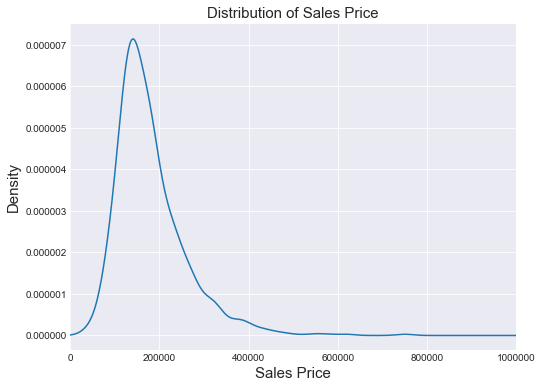

In [7]:
# The Kernel Distribution of Sales Price is plotted
data['SalePrice'].plot(kind='kde', figsize=(8,6))
plt.xlim((0,1000000))
plt.xlabel('Sales Price', size=15)
plt.ylabel('Density',size=15)
plt.title('Distribution of Sales Price', size=15)

C:\Users\harsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


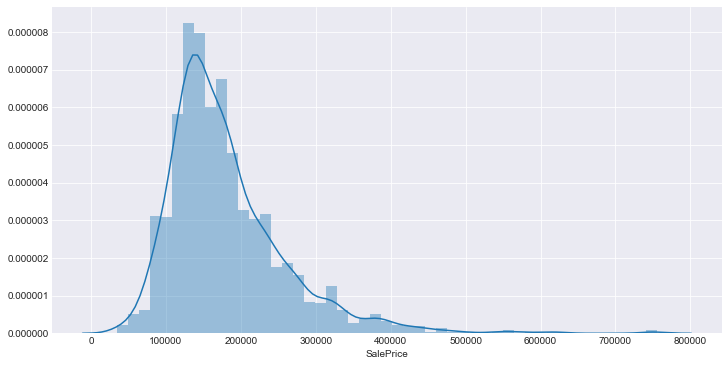

In [8]:
plt.figure(figsize=(12,6))
sns.distplot(data['SalePrice'])

Text(0,0.5,'Sales Price')

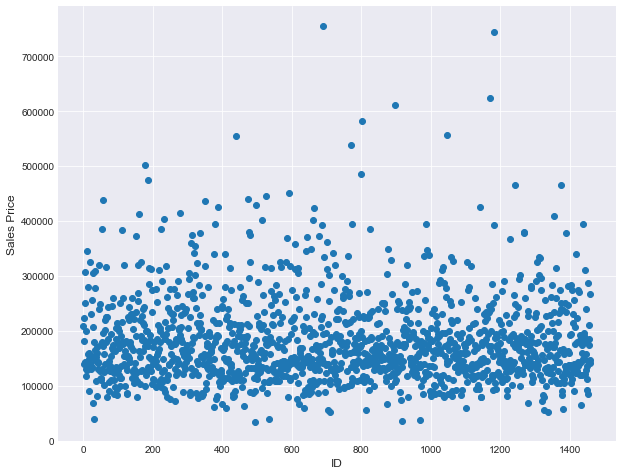

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(range(data.shape[0]), data['SalePrice'])
plt.xlabel('ID', size=12)
plt.ylabel('Sales Price', size=12)

In [10]:
# Creating a dataframe that shows columns and the number of missing values in it
nan_count = data.isna().sum().sort_values(ascending=False)

In [11]:
missing_values = nan_count[nan_count > 0]

In [12]:
missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### The columns with missing values are analyzed and then it is dropped or filled with appropriate values

In [13]:
data[data['PoolQC'].isna()==False]['PoolArea']

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

In [14]:
data[data['PoolQC'].isna()]['PoolArea'].value_counts()

0    1453
Name: PoolArea, dtype: int64

In [15]:
data['PoolQC'] = data['PoolQC'].fillna('None')

In [16]:
data['PoolQC'].isna().any()

False

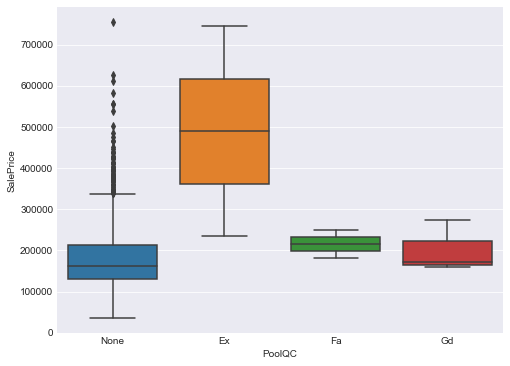

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PoolQC', y='SalePrice', data=data)

In [18]:
data['Pool'] = data['PoolQC'].map({'None':0, 'Ex':1,'Fa':1,'Gd':1})

In [19]:
data[['Pool','SalePrice']].corr()

Pool  SalePrice
Pool       1.000000   0.093708
SalePrice  0.093708   1.000000

<Figure size 864x576 with 0 Axes>

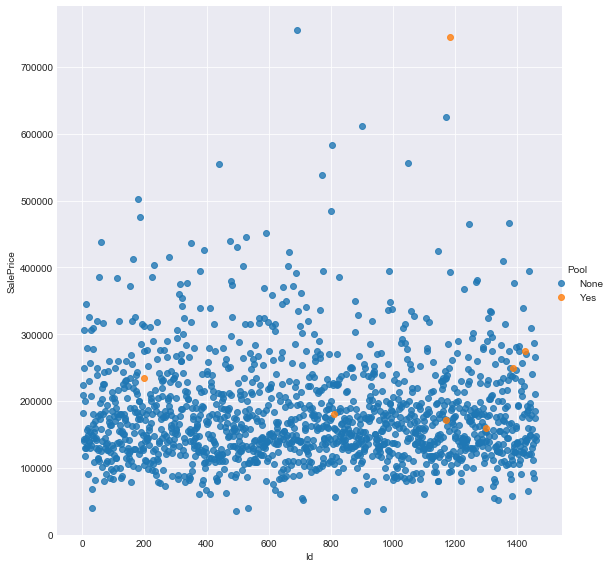

In [20]:
plt.figure(figsize=(12,8))
fig = sns.lmplot(x='Id', y='SalePrice', data=data, size=8, hue='Pool', fit_reg=False)
labels = ['None', 'Yes']
for j, k in zip(fig._legend.texts, labels): j.set_text(k)

Text(0,0.5,'Sales Price')

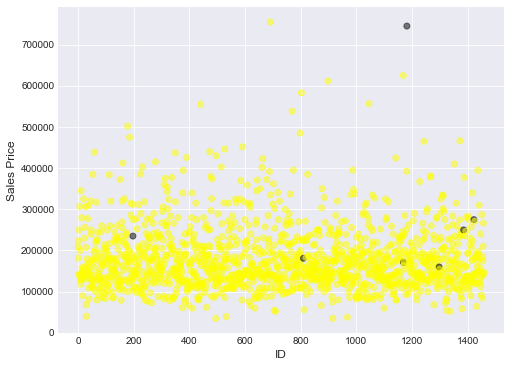

In [21]:
colors = {1: 'black', 0:'yellow'}
plt.figure(figsize=(8,6))
plt.scatter(range(data.shape[0]), data['SalePrice'], c=data['Pool'].apply(lambda x: colors[x]), alpha=0.5)
plt.xlabel('ID', size=12)
plt.ylabel('Sales Price', size=12)

In [22]:
corr = data.corr()
corr.nlargest(10, 'Pool')['Pool']

Pool            1.000000
PoolArea        0.989665
LotFrontage     0.224133
GrLivArea       0.189397
BsmtFinSF1      0.166271
TotalBsmtSF     0.151236
1stFlrSF        0.146727
Fireplaces      0.103225
TotRmsAbvGrd    0.093828
SalePrice       0.093708
Name: Pool, dtype: float64

In [23]:
data.drop('Pool', axis=1, inplace=True)
missing_values.drop('PoolQC', inplace=True)

In [24]:
data[['PoolArea', 'SalePrice']].corr()

PoolArea  SalePrice
PoolArea   1.000000   0.092404
SalePrice  0.092404   1.000000

In [25]:
delete_cols = ['PoolQC', 'PoolArea']

In [26]:
missing_values

MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [27]:
data['MiscFeature'].value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [28]:
data['MiscFeature'] = data['MiscFeature'].fillna('None')

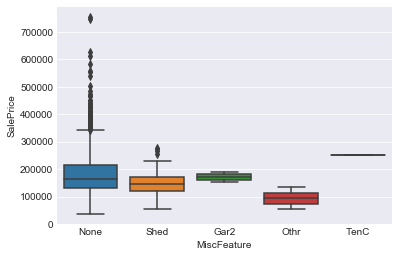

In [29]:
sns.boxplot(x=data['MiscFeature'], y=data['SalePrice'])

In [30]:
misc_feat = data.loc[data['MiscFeature']!='None', 'MiscFeature'].unique()
misc_colors = ['red','blue','green','yellow']

In [31]:
data['MiscFeature'].value_counts()['Shed']

49

[]

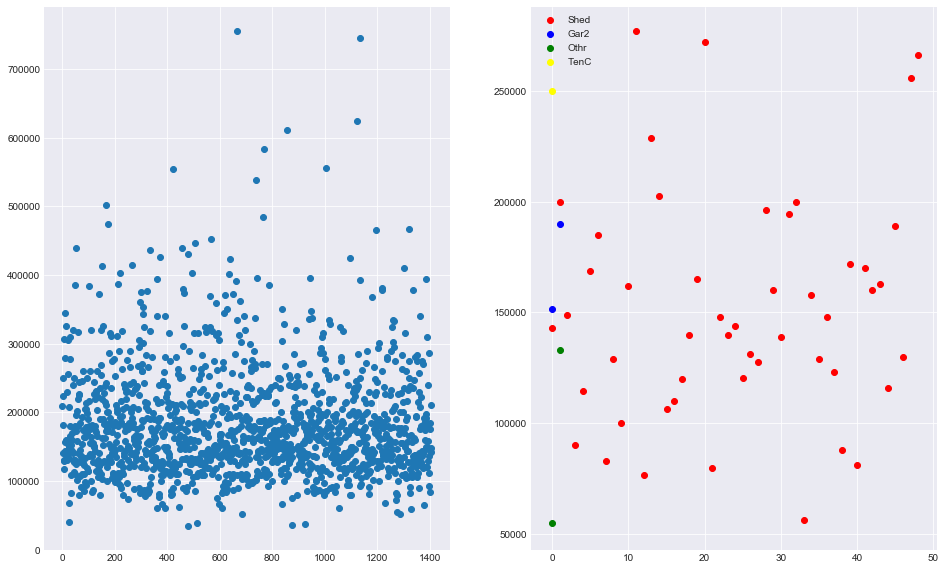

In [32]:
misc_feat = data.loc[data['MiscFeature']!='None', 'MiscFeature'].unique()
colors = ['red','blue','green','yellow']
misc_colors = dict(zip(misc_feat, colors))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))
misc = data[data['MiscFeature']!='None']['MiscFeature']
no_misc = data[data['MiscFeature']=='None']['MiscFeature']
ax1.scatter(x=range(no_misc.shape[0]), y=data[data['MiscFeature']=='None']['SalePrice'].values)
for i in range(len(misc_feat)):
    ax2.scatter(x=range(data['MiscFeature'].value_counts()[misc_feat[i]]), y=data[data['MiscFeature']==misc_feat[i]]['SalePrice'], color=colors[i], label=misc_feat[i])
plt.legend(loc='upper left')
plt.plot()

In [33]:
data[data['MiscFeature']!='None'][['MiscVal','SalePrice']].corr()

MiscVal  SalePrice
MiscVal    1.000000   0.098141
SalePrice  0.098141   1.000000

In [34]:
delete_cols = delete_cols + ['MiscFeature','MiscVal']

In [35]:
missing_values.drop('MiscFeature', inplace=True)

In [36]:
data['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [37]:
data['Alley'] = data['Alley'].fillna('None')

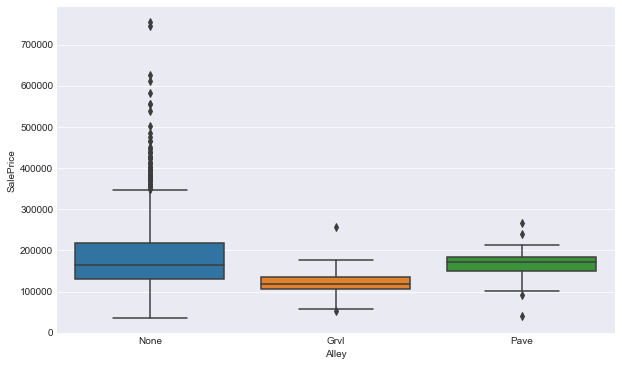

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Alley'], y=data['SalePrice'])

Text(0,0.5,'SalePrice')

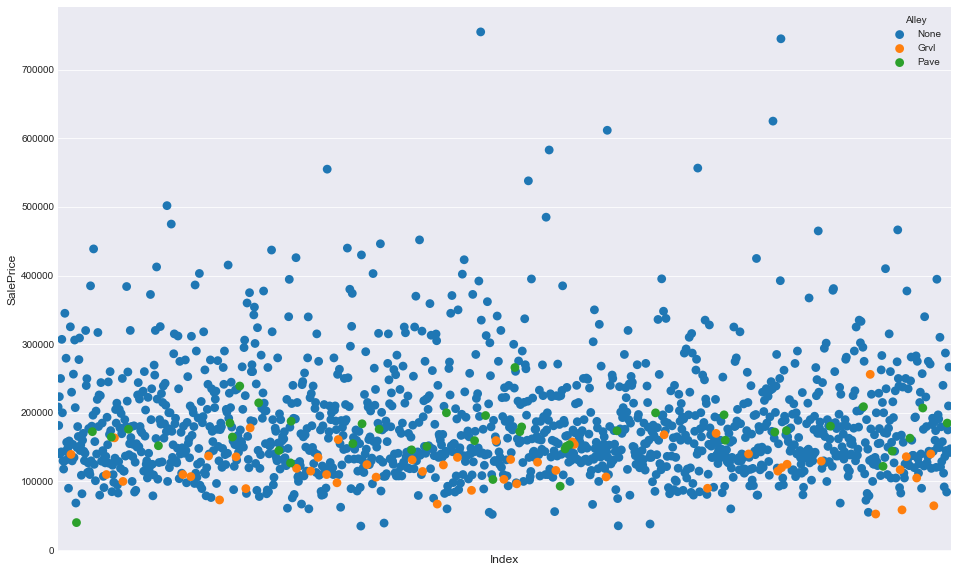

In [39]:
plt.figure(figsize=(16,10))
sns.pointplot(x=data['Id'], y=data['SalePrice'], hue=data['Alley'], join=False, alpha=0.5)
plt.xticks([])
plt.xlabel('Index', size=12)
plt.ylabel('SalePrice', size=12)

In [40]:
delete_cols = delete_cols + ['Alley']

In [41]:
missing_values.drop('Alley', inplace=True)

In [42]:
missing_values

Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [43]:
data['Fence'].dtype

dtype('O')

In [44]:
data['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [45]:
data['Fence'] = data['Fence'].fillna('None')

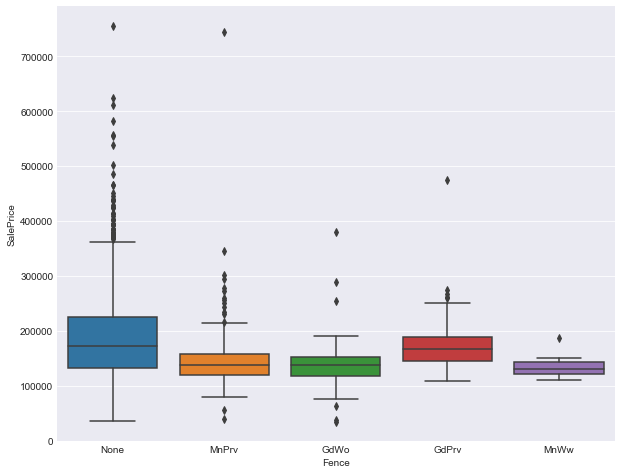

In [46]:
plt.figure(figsize=(10,8))
sns.boxplot(data['Fence'], data['SalePrice'])

In [47]:
colors = ['r', 'b', 'g', 'y', 'm', 'c', 'black']

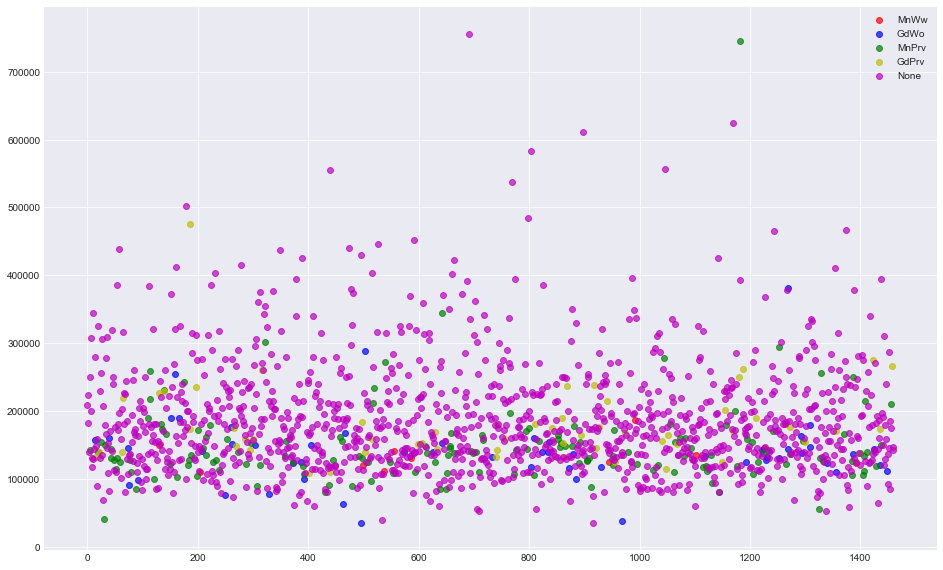

In [48]:
fence = data.groupby('Fence').mean()['SalePrice'].sort_values().index
plt.figure(figsize=(16,10))
for i, j in enumerate(fence):
    plt.scatter(x=data[data['Fence']==j].index, y=data[data['Fence']==j]['SalePrice'], c=colors[i], alpha=0.7, label=j)
plt.legend()

In [49]:
fence

Index(['MnWw', 'GdWo', 'MnPrv', 'GdPrv', 'None'], dtype='object', name='Fence')

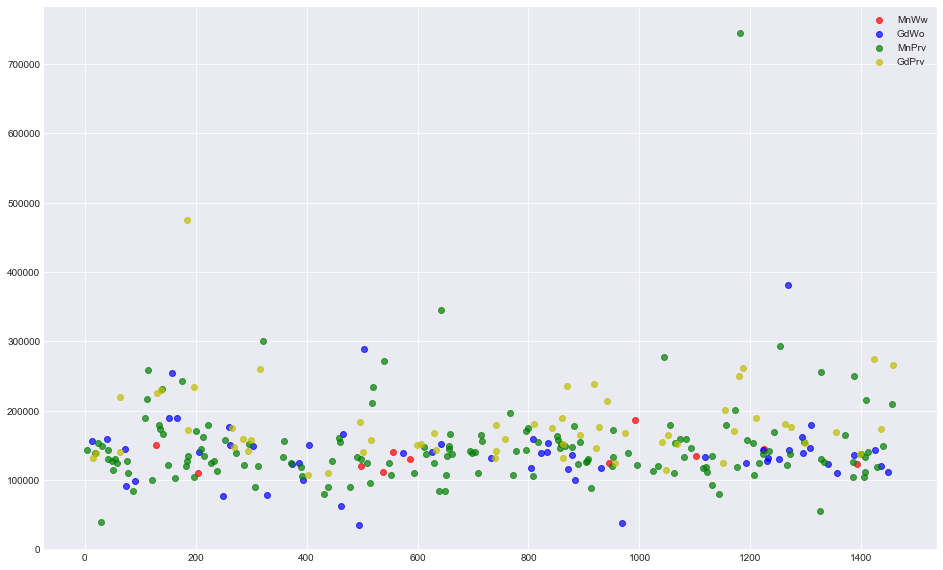

In [50]:
plt.figure(figsize=(16,10))
for i, j in enumerate(fence[:4]):
    plt.scatter(x=data[data['Fence']==j].index, y=data[data['Fence']==j]['SalePrice'], c=colors[i], alpha=0.7, label=j)
plt.legend()

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text yticklabel objects>)

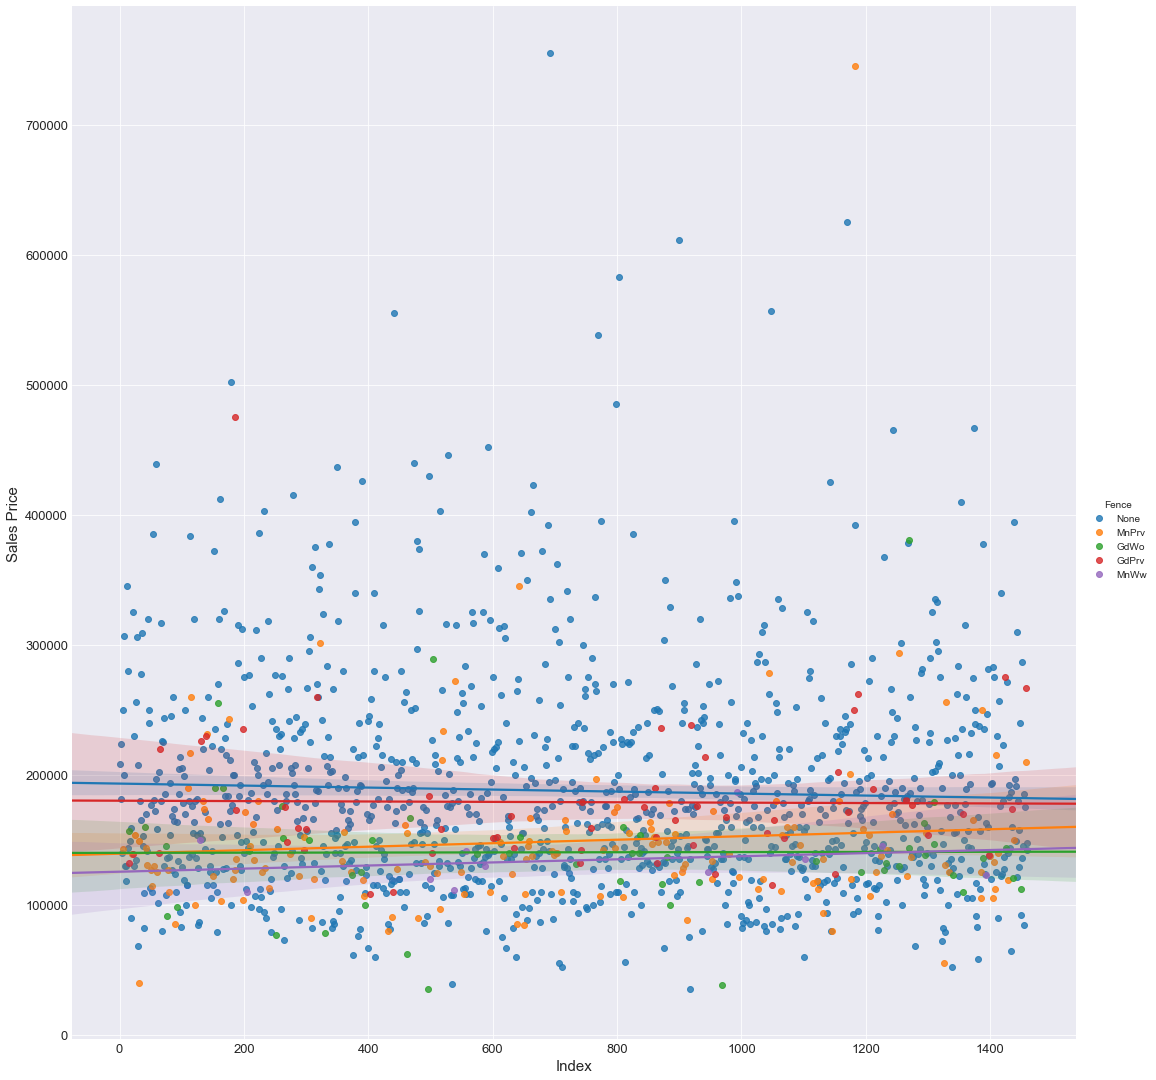

In [51]:
sns.lmplot(x='Id', y='SalePrice', data=data, hue='Fence', size=15)
plt.xlabel('Index', size=15)
plt.ylabel('Sales Price', size=15)
plt.xticks(size=13)
plt.yticks(size=13)

In [52]:
fence_map = dict(zip(fence, range(len(fence))))
data['Int-Fence'] = data['Fence'].map(fence_map)

In [53]:
data[['Int-Fence','SalePrice']].corr()

Int-Fence  SalePrice
Int-Fence   1.000000   0.185559
SalePrice   0.185559   1.000000

In [54]:
data.corr()['Int-Fence'].abs().sort_values(ascending=False).head()

Int-Fence      1.000000
GarageYrBlt    0.235165
FullBath       0.224665
YearBuilt      0.220479
OverallQual    0.217552
Name: Int-Fence, dtype: float64

In [55]:
data.drop('Int-Fence', axis=1, inplace=True)
#train['Fence'] = data['Fence'].map(fence_map)
missing_values.drop('Fence', inplace=True)

In [56]:
#final_map['Fence'] = fence_map

In [57]:
missing_values.head()

FireplaceQu    690
LotFrontage    259
GarageCond      81
GarageType      81
GarageYrBlt     81
dtype: int64

In [58]:
data['FireplaceQu'].dtype

dtype('O')

In [59]:
data['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [60]:
data['Fireplaces'].value_counts(dropna=False)

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [61]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

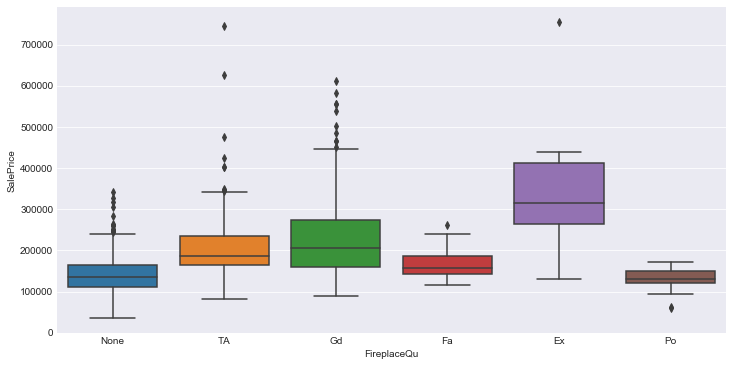

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['FireplaceQu'], y=data['SalePrice'])

In [63]:
fireplace = data.groupby('FireplaceQu').mean()['SalePrice'].sort_values().index
fire_map = dict(zip(fireplace, range(len(fireplace))))

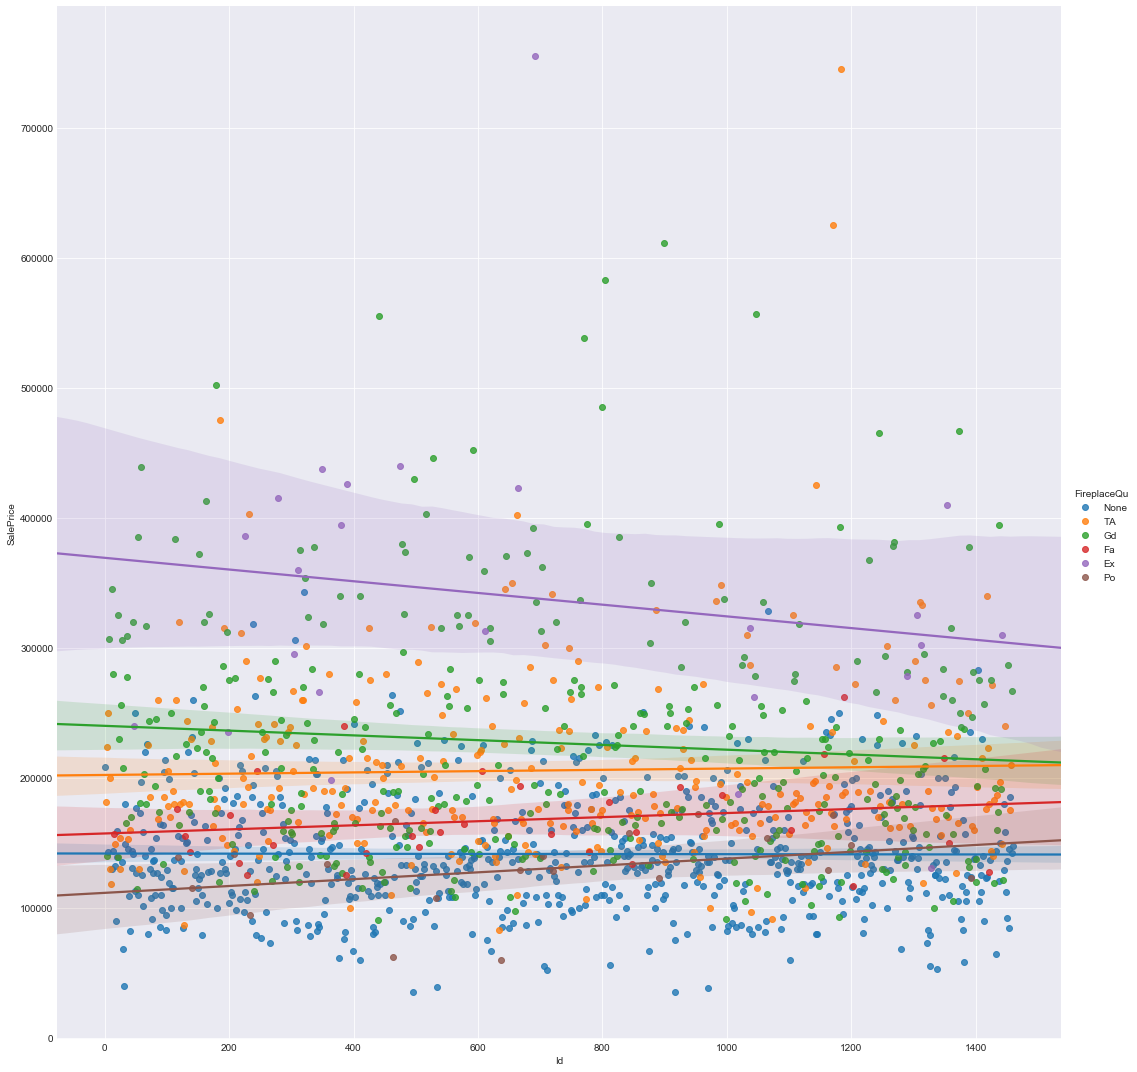

In [64]:
sns.lmplot(x='Id', y='SalePrice', hue='FireplaceQu', data=data, size=15)

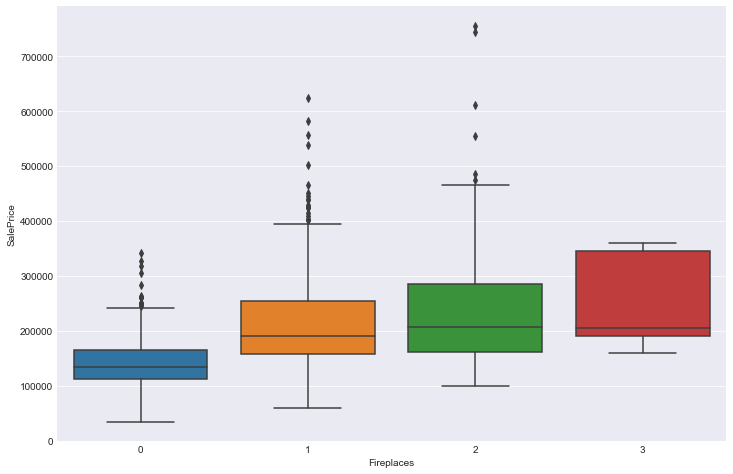

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data['Fireplaces'], y=data['SalePrice'])

In [66]:
data['Int-Fire'] = data['FireplaceQu'].map(fire_map)

In [67]:
data[['Int-Fire','Fireplaces','SalePrice']].corr()

Int-Fire  Fireplaces  SalePrice
Int-Fire    1.000000    0.812340   0.525932
Fireplaces  0.812340    1.000000   0.466929
SalePrice   0.525932    0.466929   1.000000

In [68]:
data.drop('Int-Fire', axis=1, inplace=True)
#train['FireplaceQu'] = data['FireplaceQu'].map(fire_map)
missing_values.drop('FireplaceQu', inplace=True)
#final_map['FireplaceQu'] = fire_map

In [69]:
missing_values.head()

LotFrontage     259
GarageCond       81
GarageType       81
GarageYrBlt      81
GarageFinish     81
dtype: int64

In [70]:
data['LotFrontage'].dtype

dtype('float64')

In [71]:
data[data['LotFrontage']>0].corr()['LotFrontage'].abs().sort_values(ascending=False).head(10)

LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
MSSubClass      0.386347
TotRmsAbvGrd    0.352096
SalePrice       0.351799
GarageArea      0.344997
GarageCars      0.285691
Name: LotFrontage, dtype: float64

In [72]:
data['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [73]:
data['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [74]:
data.groupby(['LotConfig', 'LotShape']).count()['LotArea']

LotConfig  LotShape
Corner     IR1         107
           IR2           8
           IR3           2
           Reg         146
CulDSac    IR1          77
           IR2          14
           IR3           2
           Reg           1
FR2        IR1          15
           IR2           5
           Reg          27
FR3        IR1           1
           Reg           3
Inside     IR1         284
           IR2          14
           IR3           6
           Reg         748
Name: LotArea, dtype: int64

In [75]:
lot_data = data.set_index(['LotConfig','LotShape'])

In [76]:
lot_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street  \
LotConfig LotShape                                                         
Inside    Reg        1          60       RL         65.0     8450   Pave   
FR2       Reg        2          20       RL         80.0     9600   Pave   
Inside    IR1        3          60       RL         68.0    11250   Pave   
Corner    IR1        4          70       RL         60.0     9550   Pave   
FR2       IR1        5          60       RL         84.0    14260   Pave   

                   Alley LandContour Utilities LandSlope    ...    PoolArea  \
LotConfig LotShape                                          ...               
Inside    Reg       None         Lvl    AllPub       Gtl    ...           0   
FR2       Reg       None         Lvl    AllPub       Gtl    ...           0   
Inside    IR1       None         Lvl    AllPub       Gtl    ...           0   
Corner    IR1       None         Lvl    AllPub       Gtl    ...           0   
FR2       IR1       None         Lvl    AllPub       Gtl    ...           0   

                   PoolQC Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  \
LotConfig LotShape                                                              
Inside    Reg        None  None        None       0       2    2008        WD   
FR2       Reg        None  None        None       0       5    2007        WD   
Inside    IR1        None  None        None       0       9    2008        WD   
Corner    IR1        None  None        None       0       2    2006        WD   
FR2       IR1        None  None        None       0      12    2008        WD   

                    SaleCondition SalePrice  
LotConfig LotShape                           
Inside    Reg              Normal    208500  
FR2       Reg              Normal    181500  
Inside    IR1              Normal    223500  
Corner    IR1             Abnorml    140000  
FR2       IR1              Normal    250000  

[5 rows x 79 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

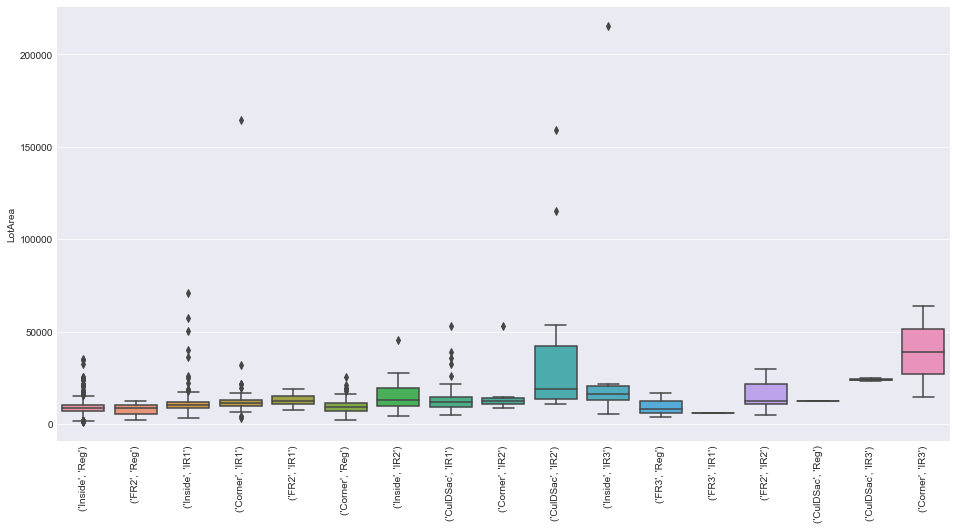

In [77]:
plt.figure(figsize=(16,8))
sns.boxplot(x=lot_data.index, y=lot_data['LotArea'])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

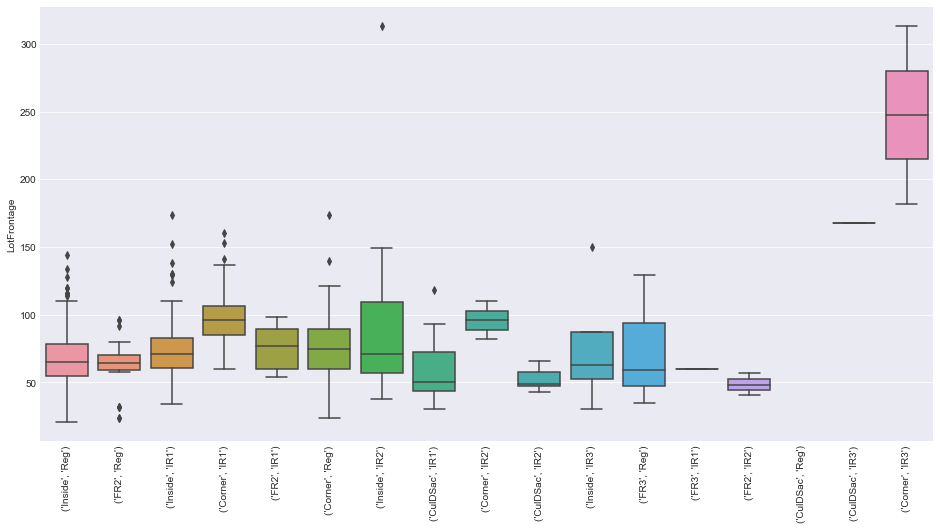

In [78]:
plt.figure(figsize=(16,8))
sns.boxplot(x=lot_data.index, y=lot_data['LotFrontage'])
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

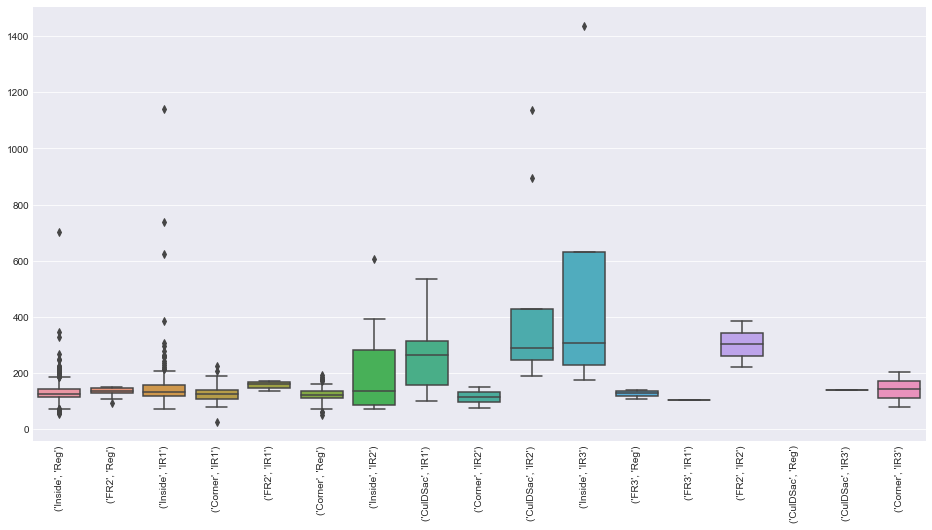

In [79]:
plt.figure(figsize=(16,8))
sns.boxplot(x=lot_data.index, y=lot_data['LotArea']/lot_data['LotFrontage'])
plt.xticks(rotation='vertical')

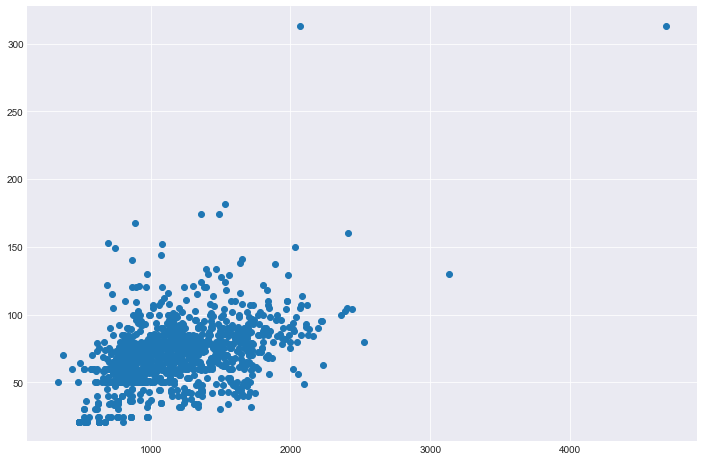

In [80]:
plt.figure(figsize=(12,8))
plt.scatter(x=data['1stFlrSF'], y=data['LotFrontage'])

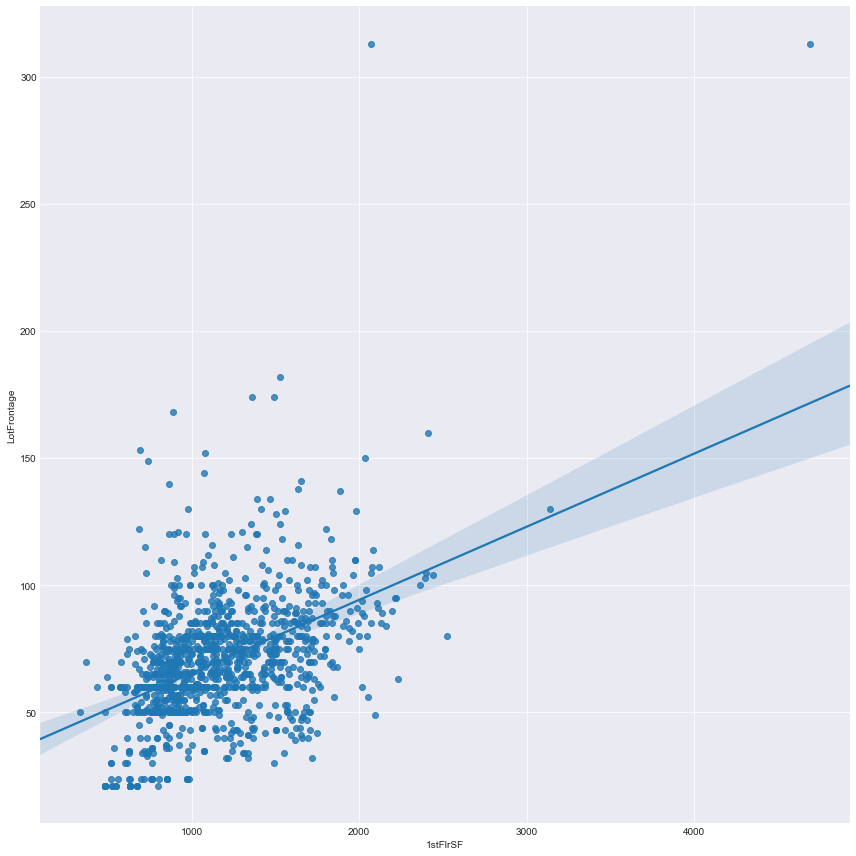

In [81]:
sns.lmplot(x='1stFlrSF', y='LotFrontage', data=data, size=12)

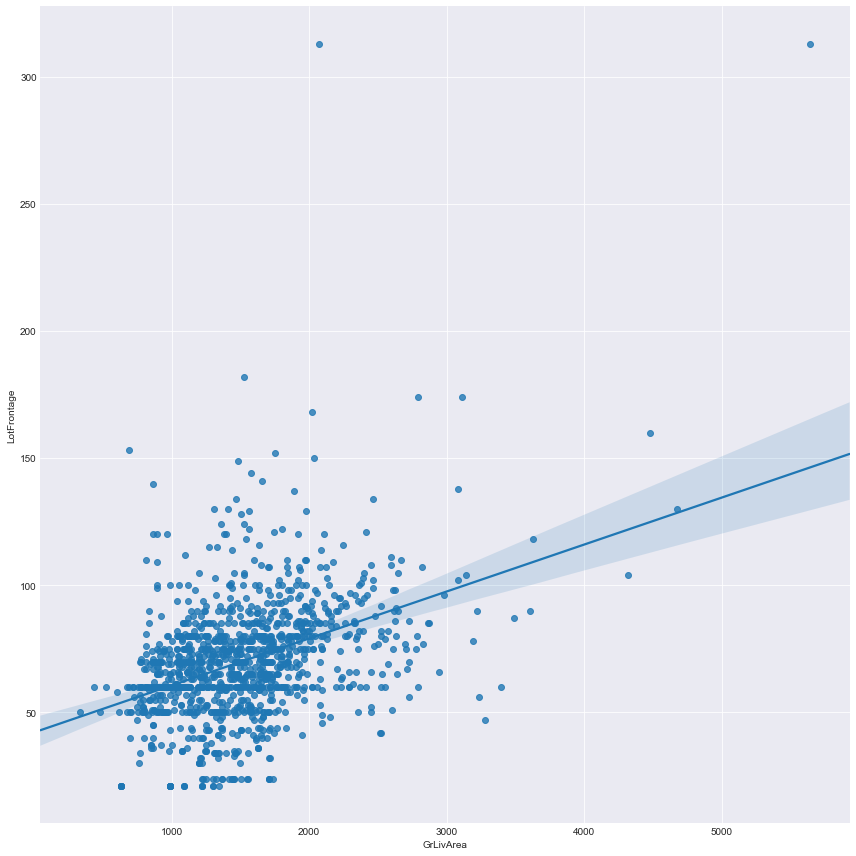

In [82]:
sns.lmplot(x='GrLivArea', y='LotFrontage', data=data, size=12)

In [83]:
len(data[data['1stFlrSF']== data['GrLivArea']])

819

In [84]:
bool_sf = data['1stFlrSF']== data['GrLivArea']

In [85]:
bool_sf.values

array([False,  True, False, ..., False,  True,  True])

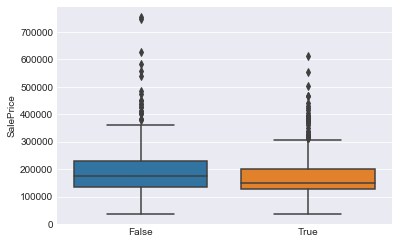

In [86]:
sns.boxplot(x=bool_sf.values, y=data['SalePrice'])

In [87]:
data['LotFrontage'] = data['LotFrontage'].fillna(0)

In [88]:
lot_features = data[data['LotFrontage']>0].corr()['LotFrontage'].abs().sort_values(ascending=False).head(7)[1:].index
lot_features = list(lot_features)
lot_features.extend(['LotShape','LotConfig'])

In [89]:
X = data[lot_features]
y = data['LotFrontage']

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
1stFlrSF        1460 non-null int64
LotArea         1460 non-null int64
GrLivArea       1460 non-null int64
TotalBsmtSF     1460 non-null int64
MSSubClass      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
LotShape        1460 non-null object
LotConfig       1460 non-null object
dtypes: int64(6), object(2)
memory usage: 91.3+ KB


In [91]:
for i,j in enumerate(X.columns):
    if X[j].dtype=='O':
        mapping = dict(zip(X[j].unique(), range(len(X[j].unique()))))
        X[j] = X[j].map(mapping)

C:\Users\harsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [92]:
X_train = X[data['LotFrontage']>0]
y_train = y[data['LotFrontage']>0]

In [93]:
X_test = X[data['LotFrontage']==0]

In [94]:
linearReg = LinearRegression()

In [95]:
linearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
lotFrontage = linearReg.predict(X_test)

In [97]:
train['LotFrontage'] = train['LotFrontage'].fillna(0)

In [98]:
train.loc[train['LotFrontage']==0, 'LotFrontage'] = lotFrontage

In [99]:
train.corr()['LotFrontage'].abs().sort_values(ascending=False).head(10)

LotFrontage     1.000000
1stFlrSF        0.479742
LotArea         0.464211
GrLivArea       0.421129
TotalBsmtSF     0.397644
MSSubClass      0.394225
SalePrice       0.366261
TotRmsAbvGrd    0.366241
GarageArea      0.335563
Fireplaces      0.288541
Name: LotFrontage, dtype: float64

In [100]:
data[data['LotFrontage']>0].corr()['LotFrontage'].abs().sort_values(ascending=False).head(10)

LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
MSSubClass      0.386347
TotRmsAbvGrd    0.352096
SalePrice       0.351799
GarageArea      0.344997
GarageCars      0.285691
Name: LotFrontage, dtype: float64

In [101]:
missing_values.drop('LotFrontage', inplace=True)
missing_values

GarageCond      81
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [102]:
garage_cols = list(missing_values.head(5).index)
garage_cols

['GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']

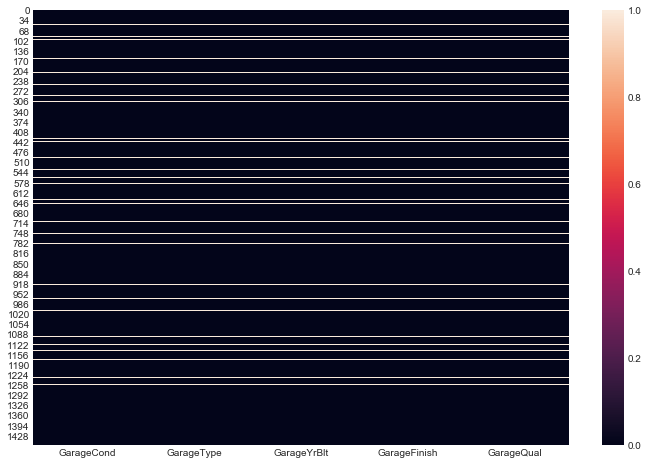

In [103]:
plt.figure(figsize=(12,8))
sns.heatmap(data[garage_cols].isna())

In [104]:
data['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [105]:
data[data['GarageType'].isna()]['GarageArea'].value_counts()

0    81
Name: GarageArea, dtype: int64

In [106]:
data[data['GarageArea']==0]['GarageType'].value_counts(dropna=False)

NaN    81
Name: GarageType, dtype: int64

In [107]:
data[data['GarageType'].isna()]['GarageCars'].value_counts()

0    81
Name: GarageCars, dtype: int64

In [108]:
data[data['GarageCars']==0]['GarageType'].value_counts(dropna=False)

NaN    81
Name: GarageType, dtype: int64

In [109]:
garage_cols

['GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']

In [110]:
data['GarageCond'] = data['GarageCond'].fillna('None')

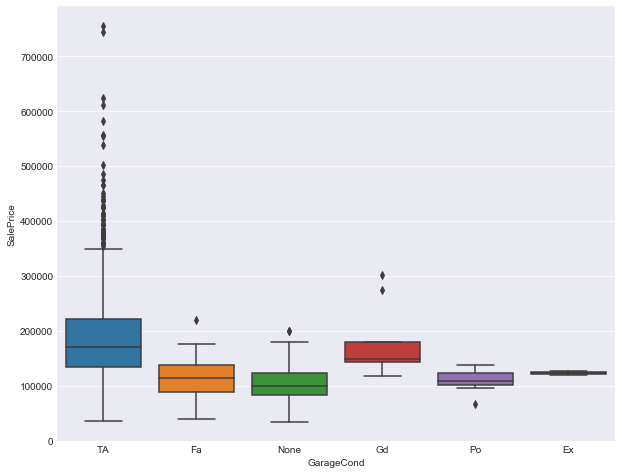

In [111]:
plt.figure(figsize=(10,8))
sns.boxplot(x='GarageCond', y='SalePrice', data=data)

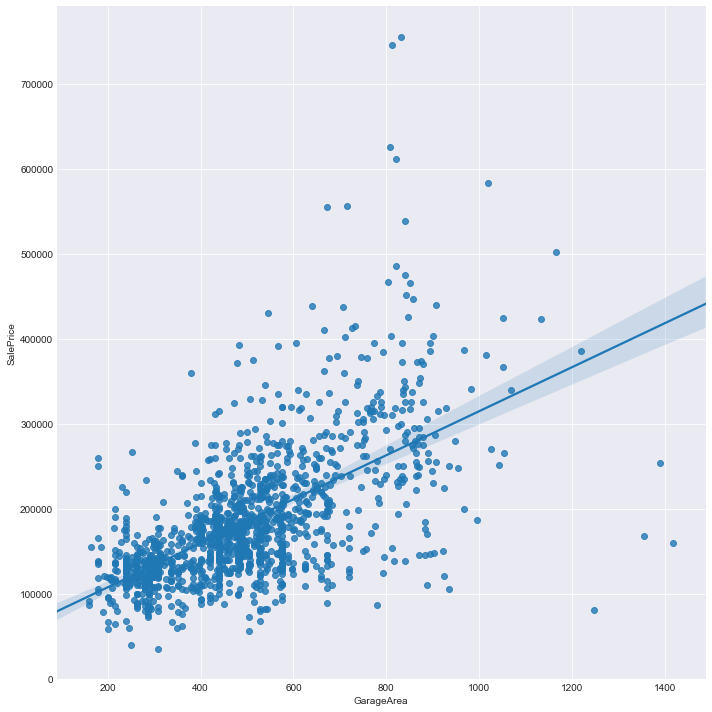

In [112]:
sns.lmplot(x='GarageArea', y='SalePrice', data=data[data['GarageArea']!=0], size=10)

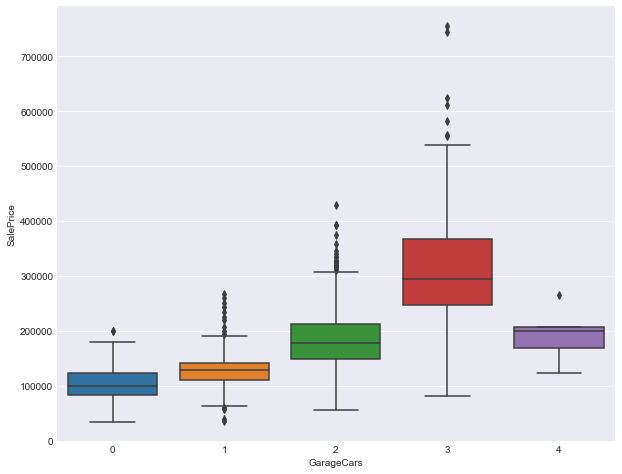

In [113]:
plt.figure(figsize=(10,8))
sns.boxplot(x='GarageCars', y='SalePrice', data=data)

In [114]:
data['GarageFinish'].value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [115]:
data['GarageFinish'] = data['GarageFinish'].fillna('None')

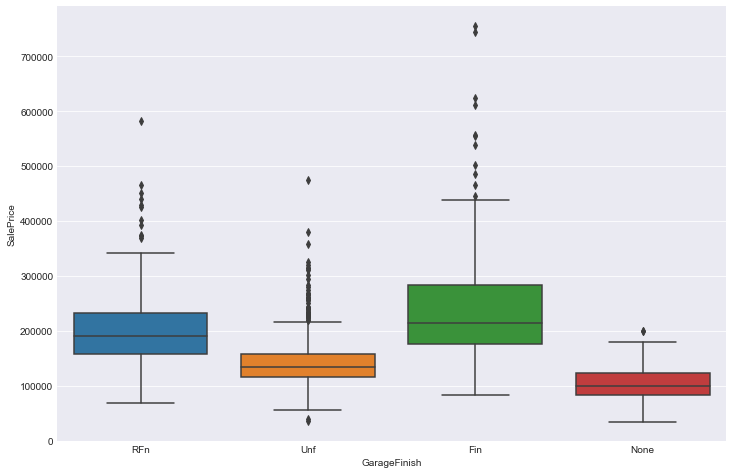

In [116]:
plt.figure(figsize=(12,8))
sns.boxplot(x='GarageFinish', y='SalePrice', data=data)

In [117]:
#garagefin = data.groupby('GarageFinish').mean()['SalePrice'].sort_values().index
#final_map['GarageFinish'] = dict(zip(garagefin, range(len(garagefin))))
#train['GarageFinish'] = data['GarageFinish'].map(final_map['GarageFinish'])

In [118]:
data['GarageQual'] = data['GarageQual'].fillna('None')

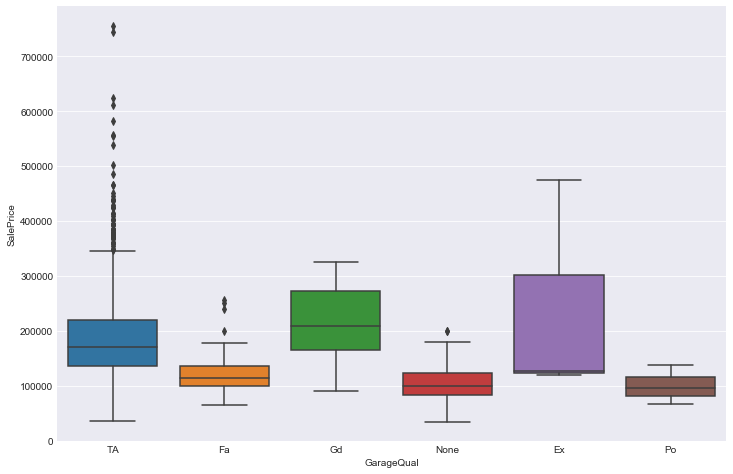

In [119]:
plt.figure(figsize=(12,8))
sns.boxplot(x='GarageQual', y='SalePrice', data=data)

In [120]:
data[data['GarageQual']=='Ex']['SalePrice']

185    475000
268    120500
760    127500
Name: SalePrice, dtype: int64

In [121]:
#garagequal = data.groupby('GarageQual').mean()['SalePrice'].sort_values().index
#final_map['GarageQual'] = dict(zip(garagequal, range(len(garagequal))))
#train['GarageQual'] = data['GarageQual'].map(final_map['GarageQual'])

In [122]:
data.groupby('GarageQual').mean()['SalePrice'].sort_values()

GarageQual
Po      100166.666667
None    103317.283951
Fa      123573.354167
TA      187489.836003
Gd      215860.714286
Ex      241000.000000
Name: SalePrice, dtype: float64

In [123]:
data['GarageType'] = data['GarageType'].fillna('None')

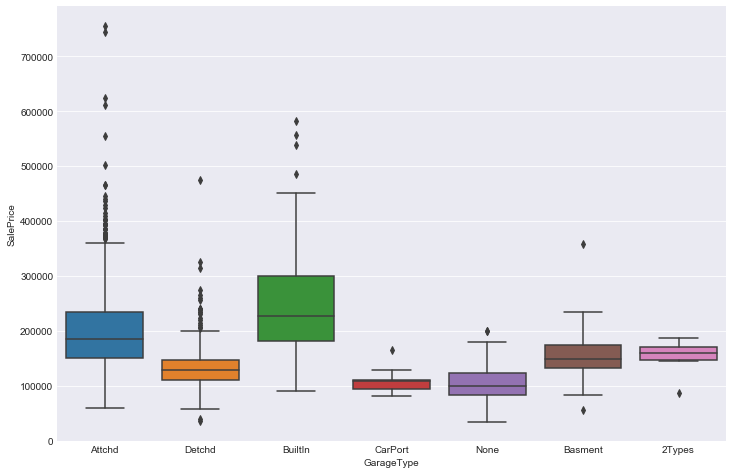

In [124]:
plt.figure(figsize=(12,8))
sns.boxplot(x='GarageType', y='SalePrice', data=data)

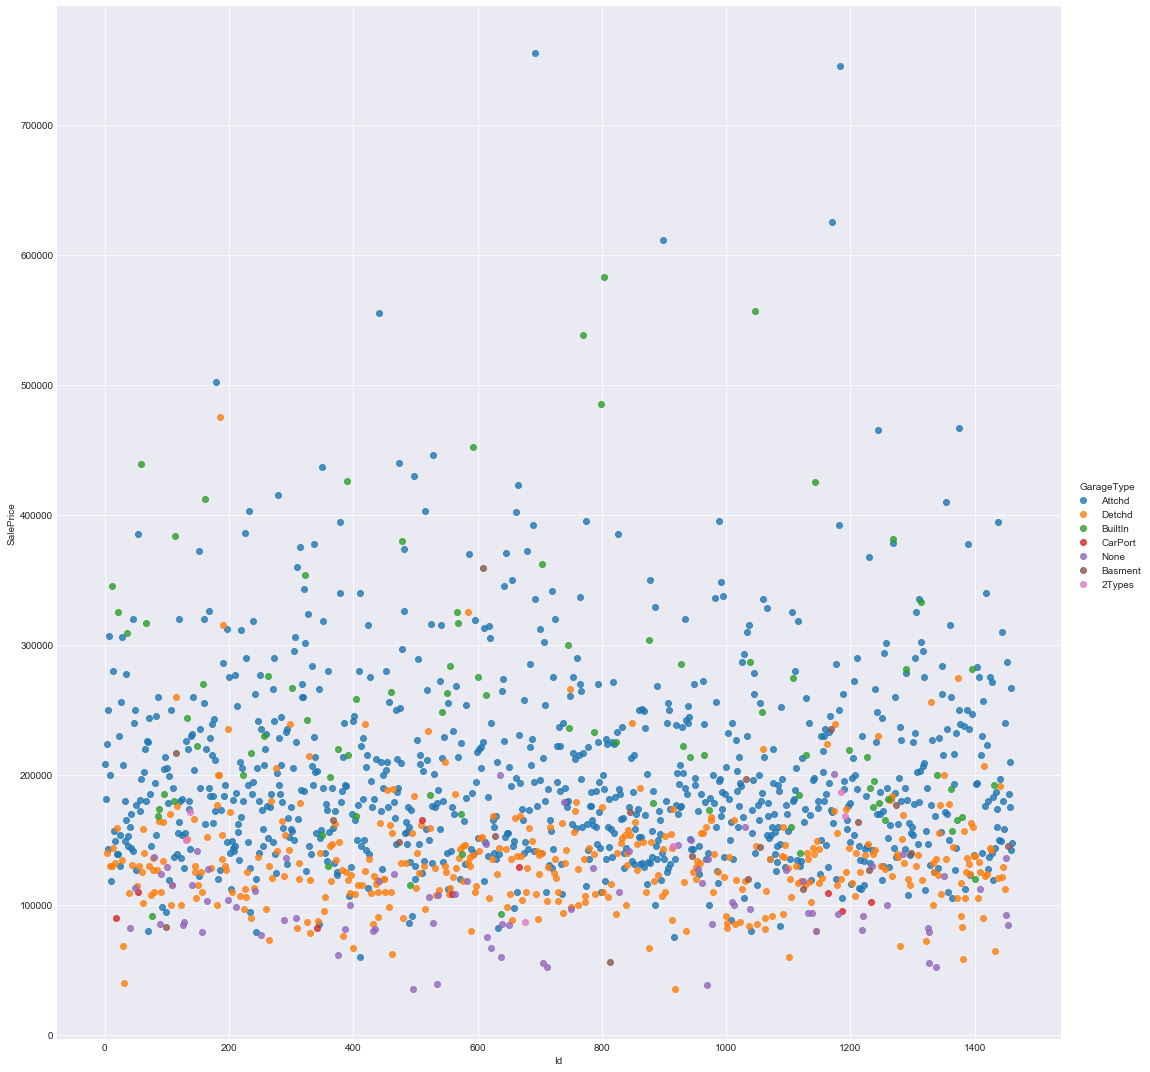

In [125]:
sns.lmplot(x='Id', y='SalePrice', hue='GarageType', size=15, data=data, fit_reg=False)

In [126]:
temp_garage = data.groupby('GarageType').mean()['SalePrice']

In [127]:
temp2_garage = data.groupby('GarageType').count()['SalePrice']/len(data)

In [128]:
temp_gar = pd.concat([temp_garage, temp2_garage], axis=1, keys=['SalePrice', 'Count'])

In [129]:
temp_gar

SalePrice     Count
GarageType                         
2Types      151283.333333  0.004110
Attchd      202892.656322  0.595890
Basment     160570.684211  0.013014
BuiltIn     254751.738636  0.060274
CarPort     109962.111111  0.006164
Detchd      134091.162791  0.265068
None        103317.283951  0.055479

In [130]:
temp_gar.reset_index(inplace=True)

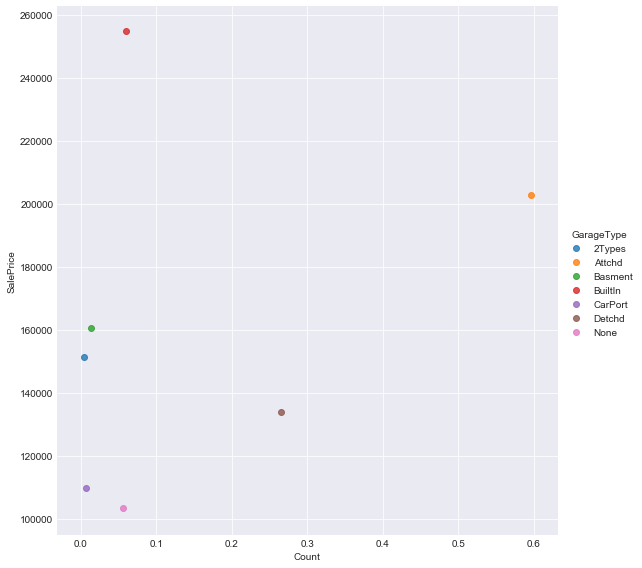

In [131]:
sns.lmplot(x='Count', y='SalePrice', data=temp_gar, fit_reg=False, size=8, hue='GarageType')

In [132]:
#garagetype = data.groupby('GarageType').mean()['SalePrice'].sort_values().index
#final_map['GarageType'] = dict(zip(garagetype, range(len(garagetype))))
#train['GarageType'] = data['GarageType'].map(final_map['GarageType'])

In [133]:
#tp = list(final_map.keys())
#tp.append('SalePrice')

In [134]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(1899)

In [135]:
#data.loc[data['GarageYrBlt']==0,'GarageYrBlt'] = 1899

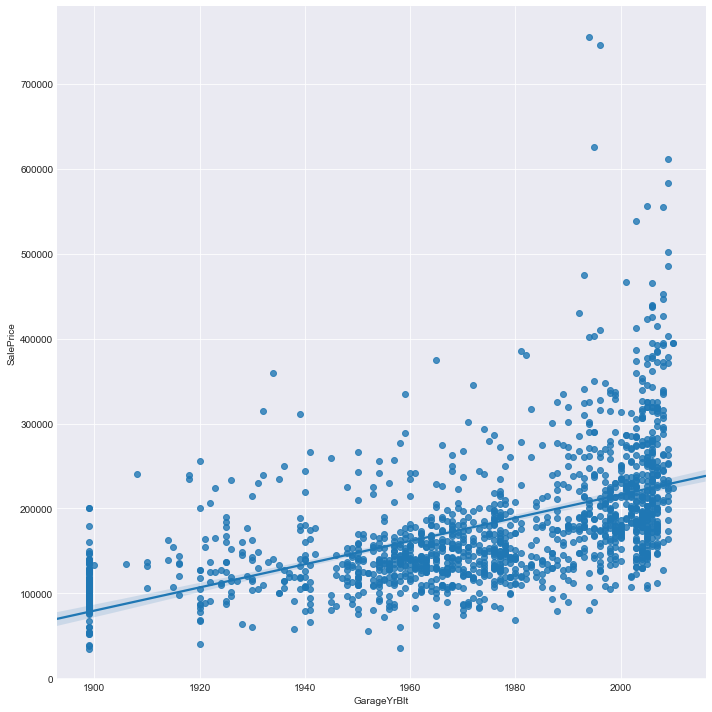

In [136]:
sns.lmplot(x='GarageYrBlt', y='SalePrice', data=data[data['GarageYrBlt']>0], fit_reg=True, size=10)

In [137]:
train['GarageYrBlt'] = data['GarageYrBlt']

In [138]:
missing_values.drop(garage_cols, inplace=True)

In [139]:
missing_values.head(6)

BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
dtype: int64

In [140]:
basement = list(missing_values.head().index)
basement

['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

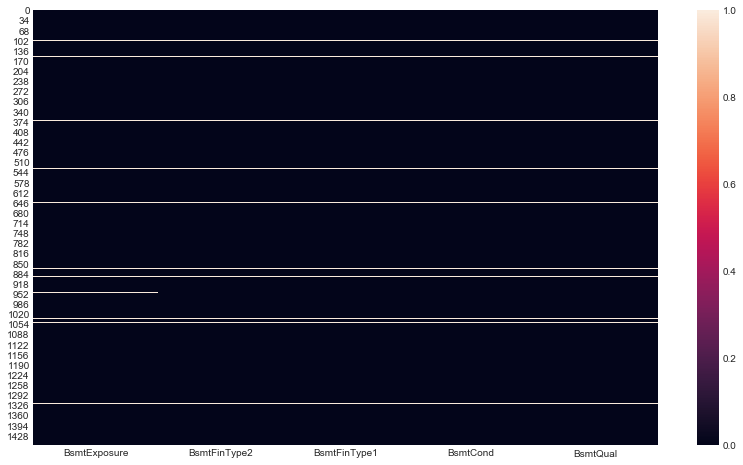

In [141]:
plt.figure(figsize=(14,8))
sns.heatmap(data[basement].isna())

In [142]:
data[data['BsmtExposure'].isna()]['BsmtFinSF1'].value_counts()

0    38
Name: BsmtFinSF1, dtype: int64

In [143]:
data.loc[data['BsmtFinType2'].isna(), 'BsmtFinSF1'].value_counts()

0       37
1124     1
Name: BsmtFinSF1, dtype: int64

In [144]:
data[data['BsmtExposure'].isna()][basement]

BsmtExposure BsmtFinType2 BsmtFinType1 BsmtCond BsmtQual
17            NaN          NaN          NaN      NaN      NaN
39            NaN          NaN          NaN      NaN      NaN
90            NaN          NaN          NaN      NaN      NaN
102           NaN          NaN          NaN      NaN      NaN
156           NaN          NaN          NaN      NaN      NaN
182           NaN          NaN          NaN      NaN      NaN
259           NaN          NaN          NaN      NaN      NaN
342           NaN          NaN          NaN      NaN      NaN
362           NaN          NaN          NaN      NaN      NaN
371           NaN          NaN          NaN      NaN      NaN
392           NaN          NaN          NaN      NaN      NaN
520           NaN          NaN          NaN      NaN      NaN
532           NaN          NaN          NaN      NaN      NaN
533           NaN          NaN          NaN      NaN      NaN
553           NaN          NaN          NaN      NaN      NaN
646           NaN          NaN          NaN      NaN      NaN
705           NaN          NaN          NaN      NaN      NaN
736           NaN          NaN          NaN      NaN      NaN
749           NaN          NaN          NaN      NaN      NaN
778           NaN          NaN          NaN      NaN      NaN
868           NaN          NaN          NaN      NaN      NaN
894           NaN          NaN          NaN      NaN      NaN
897           NaN          NaN          NaN      NaN      NaN
948           NaN          Unf          Unf       TA       Gd
984           NaN          NaN          NaN      NaN      NaN
1000          NaN          NaN          NaN      NaN      NaN
1011          NaN          NaN          NaN      NaN      NaN
1035          NaN          NaN          NaN      NaN      NaN
1045          NaN          NaN          NaN      NaN      NaN
1048          NaN          NaN          NaN      NaN      NaN
1049          NaN          NaN          NaN      NaN      NaN
1090          NaN          NaN          NaN      NaN      NaN
1179          NaN          NaN          NaN      NaN      NaN
1216          NaN          NaN          NaN      NaN      NaN
1218          NaN          NaN          NaN      NaN      NaN
1232          NaN          NaN          NaN      NaN      NaN
1321          NaN          NaN          NaN      NaN      NaN
1412          NaN          NaN          NaN      NaN      NaN

In [145]:
data[data['BsmtFinType2'].isna()][basement]

BsmtExposure BsmtFinType2 BsmtFinType1 BsmtCond BsmtQual
17            NaN          NaN          NaN      NaN      NaN
39            NaN          NaN          NaN      NaN      NaN
90            NaN          NaN          NaN      NaN      NaN
102           NaN          NaN          NaN      NaN      NaN
156           NaN          NaN          NaN      NaN      NaN
182           NaN          NaN          NaN      NaN      NaN
259           NaN          NaN          NaN      NaN      NaN
332            No          NaN          GLQ       TA       Gd
342           NaN          NaN          NaN      NaN      NaN
362           NaN          NaN          NaN      NaN      NaN
371           NaN          NaN          NaN      NaN      NaN
392           NaN          NaN          NaN      NaN      NaN
520           NaN          NaN          NaN      NaN      NaN
532           NaN          NaN          NaN      NaN      NaN
533           NaN          NaN          NaN      NaN      NaN
553           NaN          NaN          NaN      NaN      NaN
646           NaN          NaN          NaN      NaN      NaN
705           NaN          NaN          NaN      NaN      NaN
736           NaN          NaN          NaN      NaN      NaN
749           NaN          NaN          NaN      NaN      NaN
778           NaN          NaN          NaN      NaN      NaN
868           NaN          NaN          NaN      NaN      NaN
894           NaN          NaN          NaN      NaN      NaN
897           NaN          NaN          NaN      NaN      NaN
984           NaN          NaN          NaN      NaN      NaN
1000          NaN          NaN          NaN      NaN      NaN
1011          NaN          NaN          NaN      NaN      NaN
1035          NaN          NaN          NaN      NaN      NaN
1045          NaN          NaN          NaN      NaN      NaN
1048          NaN          NaN          NaN      NaN      NaN
1049          NaN          NaN          NaN      NaN      NaN
1090          NaN          NaN          NaN      NaN      NaN
1179          NaN          NaN          NaN      NaN      NaN
1216          NaN          NaN          NaN      NaN      NaN
1218          NaN          NaN          NaN      NaN      NaN
1232          NaN          NaN          NaN      NaN      NaN
1321          NaN          NaN          NaN      NaN      NaN
1412          NaN          NaN          NaN      NaN      NaN

In [146]:
basement_full = data.columns[data.columns.str.startswith('Bsmt')]

In [147]:
basement_full

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath',
       'BsmtHalfBath'],
      dtype='object')

In [148]:
base_idx = data.loc[data['BsmtCond'].isna(), basement_full].index

In [149]:
for i in basement:
    print(data[i].dtype)

object
object
object
object
object


In [150]:
for i in basement:
    data.loc[base_idx,basement] = 'None'

In [151]:
data[(data['BsmtExposure'].isna() | data['BsmtFinType2'].isna())][basement_full]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
332       Gd       TA           No          GLQ        1124          NaN   
948       Gd       TA          NaN          Unf           0          Unf   

     BsmtFinSF2  BsmtUnfSF  BsmtFullBath  BsmtHalfBath  
332         479       1603             1             0  
948           0        936             0             0

In [152]:
data['BsmtExposure'].value_counts()

No      953
Av      221
Gd      134
Mn      114
None     37
Name: BsmtExposure, dtype: int64

In [153]:
bsmtexp = list(data[(data['BsmtQual']=='Gd') & (data['BsmtCond']=='TA')]['BsmtExposure'].mode())[0]
data['BsmtExposure'] = data['BsmtExposure'].fillna(bsmtexp)
del bsmtexp

In [154]:
bsmtfintype2 =  list(data[(data['BsmtQual']=='Gd') & (data['BsmtCond']=='TA') & (data['BsmtFinType1']=='GLQ')]['BsmtFinType2'].mode())[0]
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(bsmtfintype2)
del bsmtfintype2

In [155]:
data[(data['BsmtExposure'].isna() | data['BsmtFinType2'].isna())][basement_full]

Empty DataFrame
Columns: [BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, BsmtFullBath, BsmtHalfBath]
Index: []

In [156]:
data.isna().sum().sort_values(ascending=False).head()

MasVnrType    8
MasVnrArea    8
Electrical    1
SalePrice     0
Foundation    0
dtype: int64

In [157]:
missing_values.drop(basement, inplace=True)

In [158]:
missing_values

MasVnrArea    8
MasVnrType    8
Electrical    1
dtype: int64

In [159]:
data['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [160]:
data.corr()['MasVnrArea'].abs().sort_values(ascending=False).head(10)

MasVnrArea      1.000000
SalePrice       0.477493
OverallQual     0.411876
GrLivArea       0.390857
GarageArea      0.373066
GarageCars      0.364204
TotalBsmtSF     0.363936
1stFlrSF        0.344501
YearBuilt       0.315707
TotRmsAbvGrd    0.280682
Name: MasVnrArea, dtype: float64

In [161]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [162]:
missing_values.drop(['MasVnrArea','MasVnrType'], inplace=True)

In [163]:
missing_values

Electrical    1
dtype: int64

In [164]:
data['Electrical'].mode()

0    SBrkr
dtype: object

In [165]:
elec = list(data['Electrical'].mode())[0]
data['Electrical'] = data['Electrical'].fillna(elec)

In [166]:
data.isna().sum().sort_values(ascending=False).head()

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64

In [167]:
missing_values.drop('Electrical', inplace=True)

In [168]:
cols = list(data.columns)
cols.remove('Id')
cols.remove('SalePrice')
plots = cols.copy()

### All the features are analyzed and the critical features are selected through visualization

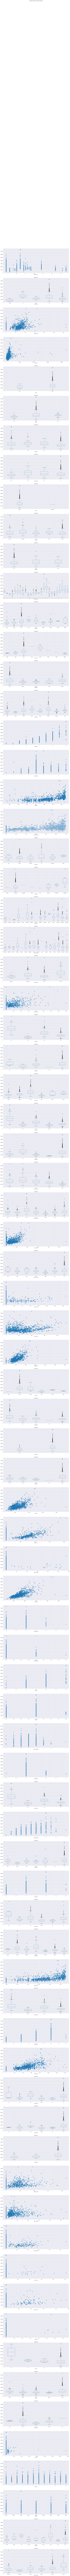

In [169]:
fig, plots = plt.subplots(len(cols), figsize=(16,600))
for i, j in enumerate(cols):
    if data[j].dtype == 'O':
        data.boxplot(column='SalePrice', by=j, ax=plots[i])
    else:
        plots[i].scatter(x=data[j], y=data['SalePrice'])
        plots[i].set_xlabel(j)

In [170]:
delete_cols

['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley']

In [171]:
delete_cols += ['Street'] + ['Utilities'] +['LandSlope'] + ['BsmtFinSF2'] + ['LowQualFinSF'] + ['BsmtHalfBath'] + ['HalfBath'] + ['BedroomAbvGr'] + ['EnclosedPorch'] + ['3SsnPorch'] + ['MoSold'] + ['YrSold']

In [172]:
# These features are not required for analysis and hence are dropped
delete_cols

['PoolQC',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'Alley',
 'Street',
 'Utilities',
 'LandSlope',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'MoSold',
 'YrSold']

In [173]:
train = data.copy()

In [174]:
train.drop(delete_cols, axis=1, inplace=True)

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 no

In [176]:
train.drop('Id', axis=1, inplace=True)

In [177]:
X = train.drop('SalePrice', axis=1)
y= np.log(train['SalePrice'])
#y = train['SalePrice']

### The categorical features are mapped to numerical values

In [178]:
mapping = {}
for i in X.columns:
    if X[i].dtype == 'O':
        feat = ((train.groupby(i).mean()['SalePrice'])*(train.groupby(i).count()['SalePrice']/len(train))/(train.groupby(i).std()['SalePrice']))
        mapping[i] = dict(zip(feat.index, feat.values))

In [179]:
for i in mapping.keys():
    for j in mapping[i].keys():
        if math.isnan(mapping[i][j]):
            mapping[i][j] = train.groupby(i).mean()['SalePrice'][j]/train['SalePrice'].mean()

In [180]:
for i in mapping.keys():
    X[i] = X[i].map(mapping[i])

In [181]:
X.head()

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0          60   1.86439         65.0     8450  1.498166     2.062041   
1          20   1.86439         80.0     9600  1.498166     2.062041   
2          60   1.86439         68.0    11250  0.795776     2.062041   
3          70   1.86439         60.0     9550  0.795776     2.062041   
4          60   1.86439         84.0    14260  0.795776     2.062041   

   LotConfig  Neighborhood  Condition1  Condition2      ...        GarageArea  \
0   1.668163      0.395671    1.959489     2.26006      ...               548   
1   0.091227      0.024858    0.187499     2.26006      ...               460   
2   1.668163      0.395671    1.959489     2.26006      ...               608   
3   0.387340      0.106836    1.959489     2.26006      ...               642   
4   0.091227      0.077552    1.959489     2.26006      ...               836   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  ScreenPorch  \
0    2.137172    2.157197    2.147864           0           61            0   
1    2.137172    2.157197    2.147864         298            0            0   
2    2.137172    2.157197    2.147864           0           42            0   
3    2.137172    2.157197    2.147864           0           35            0   
4    2.137172    2.157197    2.147864         192           84            0   

      Fence  SaleType  SaleCondition  
0  1.855221  2.115566       2.062176  
1  1.855221  2.115566       2.062176  
2  1.855221  2.115566       2.062176  
3  1.855221  2.115566       0.122426  
4  1.855221  2.115566       2.062176  

[5 rows x 62 columns]

## Machine Learning
### The algorithms used for predicting sales price are:<br>- Linear Regression<br>- Random Forest Regressor

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [275]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [276]:
lr = LinearRegression()

In [277]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [278]:
lr_pred = lr.predict(X_test)

In [279]:
mean_squared_log_error(y_test, lr_pred)

0.00010181835900855079

C:\Users\harsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


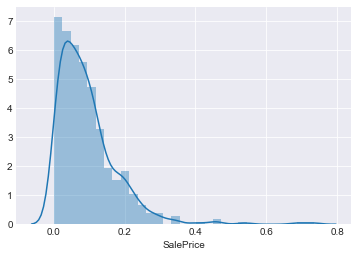

In [280]:
sns.distplot(abs(y_test-lr_pred))

In [281]:
linearreg_data = pd.DataFrame({'y_test':y_test})

In [282]:
linearreg_data2 = pd.DataFrame({'lr_pred' :lr_pred})

In [283]:
linearreg_data.reset_index(inplace=True)

In [284]:
linearreg_data.drop('index', axis=1, inplace=True)

In [285]:
lr_data = pd.concat([linearreg_data, linearreg_data2], axis=1)

In [286]:
lr_data.head()

y_test    lr_pred
0  12.380026  12.520911
1  12.834681  12.632809
2  11.813030  11.743771
3  12.001505  12.001923
4  11.840789  11.837192

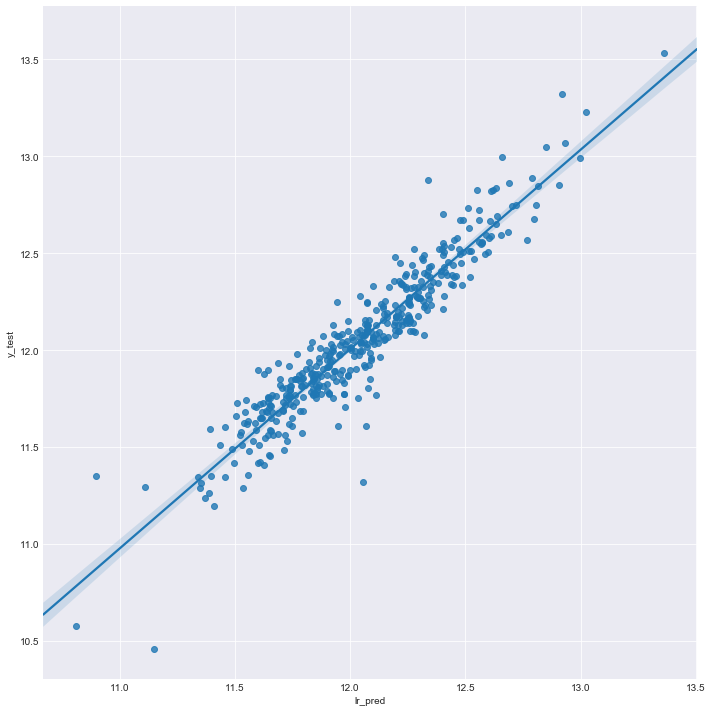

In [287]:
sns.lmplot(x='lr_pred', y='y_test', data=lr_data, size=10)

Text(0,0.5,'Absolute difference from Acutal Price')

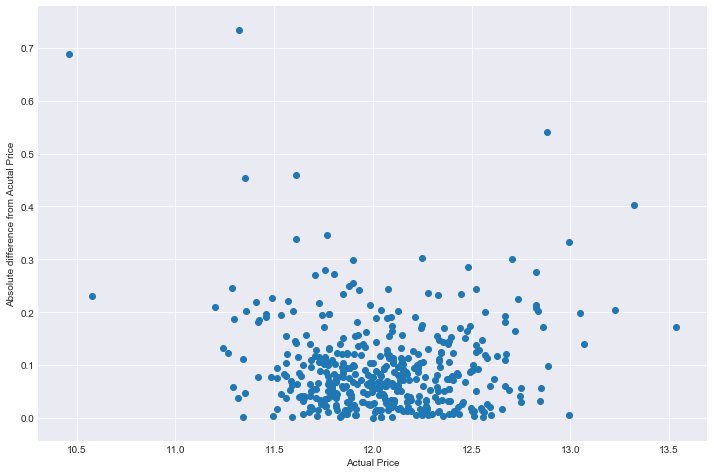

In [288]:
plt.figure(figsize=(12,8))
plt.scatter(x=lr_data['y_test'], y=abs(lr_data['y_test']-lr_data['lr_pred']))
plt.xlabel('Actual Price')
plt.ylabel('Absolute difference from Acutal Price')

### Random Forest Regressor

In [289]:
rf = RandomForestRegressor(n_estimators=1000, n_jobs=1)

In [290]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [291]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [292]:
rf_pred = rf.predict(X_test)

In [293]:
rfreg_data = pd.DataFrame({'Actual':y_test})
rfreg_data2 = pd.DataFrame({'Predicted': rf_pred})
rfreg_data.reset_index(inplace=True)
rfreg_data.drop('index', axis=1, inplace=True)

In [294]:
rf_data = pd.concat([rfreg_data, rfreg_data2], axis=1)

In [295]:
rf_data.head()

Actual  Predicted
0  12.380026  12.471989
1  12.834681  12.503241
2  11.813030  11.746946
3  12.001505  11.945099
4  11.840789  11.828825

In [296]:
mean_squared_log_error(y_test, rf_pred)

0.00011401713967864276

C:\Users\harsh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


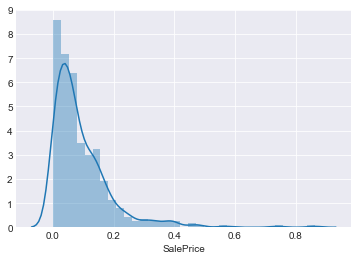

In [297]:
sns.distplot(abs(y_test-rf_pred))

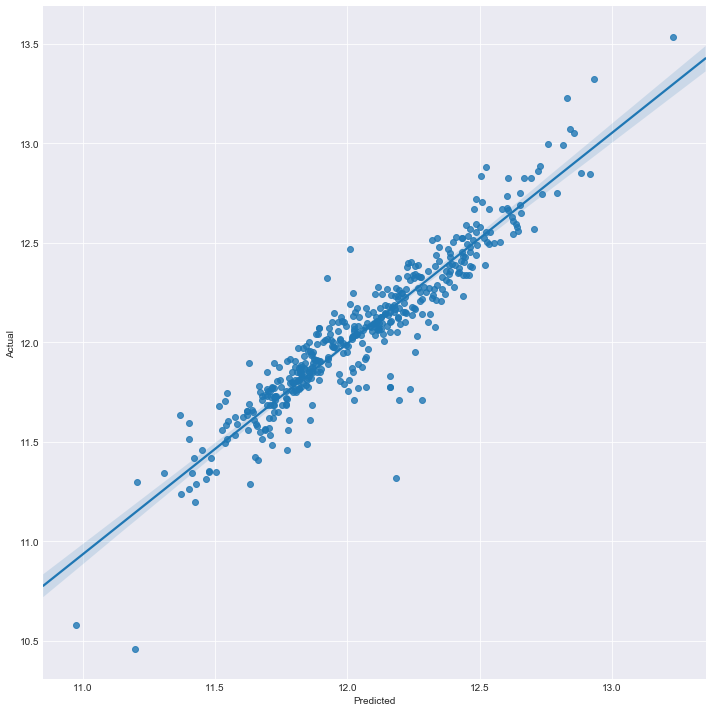

In [298]:
sns.lmplot(x='Predicted', y='Actual', data=rf_data, size=10)

Text(0,0.5,'Absolute difference from Acutal Price')

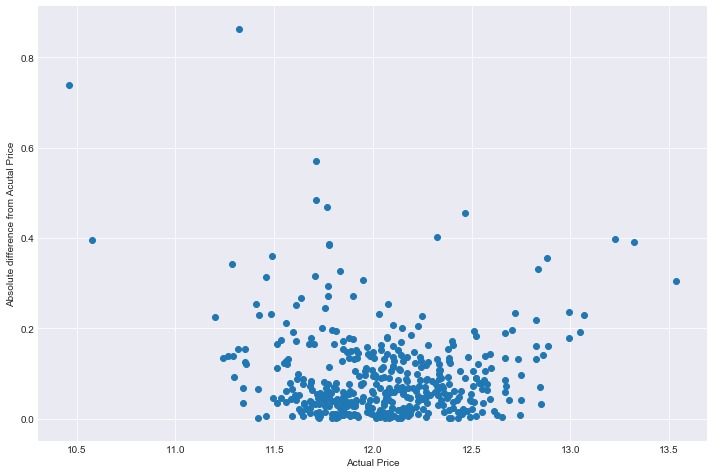

In [299]:
plt.figure(figsize=(12,8))
plt.scatter(x=rf_data['Actual'], y=abs(rf_data['Actual']-rf_data['Predicted']))
plt.xlabel('Actual Price')
plt.ylabel('Absolute difference from Acutal Price')

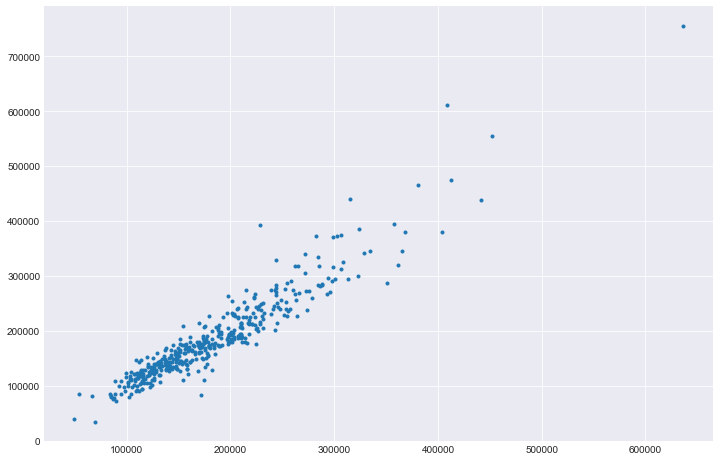

In [300]:
plt.figure(figsize=(12,8))
plt.plot(np.exp(lr_pred), np.exp(y_test), '.')
plt.show()

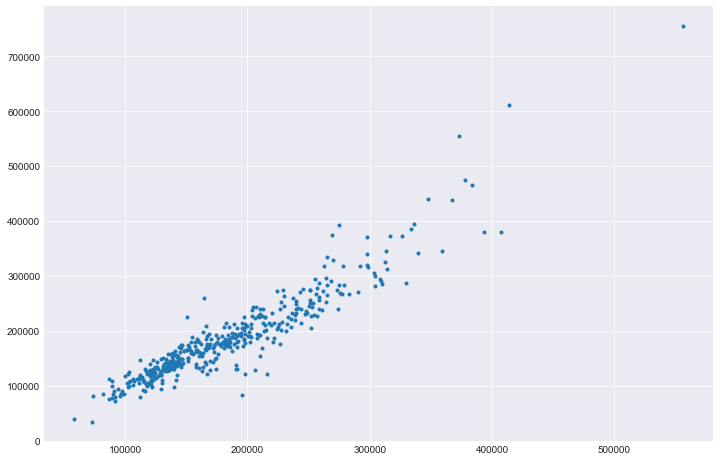

In [301]:
plt.figure(figsize=(12,8))
plt.plot(np.exp(rf_pred), np.exp(y_test), '.')
plt.show()

## Comparison of Results from Linear Regression and Random Forest Regressor

In [302]:
def rmse(predictions, targets):
    return np.sqrt(((np.log(predictions) - np.log(targets)) ** 2).mean())

In [303]:
print('Root-Mean-Squared-Error: {}\n'.format(round(rmse(np.exp(y_test), np.exp(lr_pred)), 4)))
print('Explained variance (R2): {}%'.format(round(lr.score(X_test, y_test)*100), 2))

Root-Mean-Squared-Error: 0.1304

Explained variance (R2): 89.0%


In [304]:
print('Root-Mean-Squared-Error: {}\n'.format(round(rmse(np.exp(y_test), np.exp(rf_pred)), 4)))
print('Explained variance (R2): {}%'.format(round(rf.score(X_test, y_test)*100), 2))

Root-Mean-Squared-Error: 0.1381

Explained variance (R2): 87.0%
